In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pickle

In [2]:
pwd

'/Users/sanju/Documents/DS/Generative AI/NLP/bank_exit_pred__using_DL_Project/reserach'

In [3]:
import os
os.chdir("..")

In [4]:
pwd

'/Users/sanju/Documents/DS/Generative AI/NLP/bank_exit_pred__using_DL_Project'

In [5]:
data=pd.read_csv("data/Churn_Modelling.csv")

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.shape

(10000, 14)

In [8]:
## here we need some kind of basic preprocessing and feature engineering 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
#here is the most important key for finding out the key for selecting the data types in pandas
data.select_dtypes("object")

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [11]:
#this is the way for finding out the columns according to there dtypes
data.select_dtypes(["int","float","object"])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
df=data.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [13]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [14]:
df.shape 

(10000, 11)

In [15]:
# Define features (X) and target (y)
X = df.drop(columns=['Exited'])  # Independent variables
y = df['Exited']  # Target variable

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display results
print("X_train:\n", X_train)
print("\nX_test:\n", X_test)
print("\ny_train:\n", y_train)
print("\ny_test:\n", y_test)

X_train:
       CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
9254          686    France    Male   32       6       0.00              2   
1561          632   Germany    Male   42       4  119624.60              2   
1670          559     Spain    Male   24       3  114739.92              1   
6087          561    France  Female   27       9  135637.00              1   
6669          517    France    Male   56       9  142147.32              1   
...           ...       ...     ...  ...     ...        ...            ...   
5734          768    France    Male   54       8   69712.74              1   
5191          682    France  Female   58       1       0.00              1   
5390          735    France  Female   38       1       0.00              3   
860           667    France    Male   43       8  190227.46              1   
7270          697   Germany    Male   51       1  147910.30              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
92

In [16]:
cat_features=X_train.select_dtypes("object").columns

In [17]:
for i in range(len(cat_features)):
    print(df[cat_features[i]].value_counts())
    print(">>>>"*30)
    print(">>>>"*30)

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Gender
Male      5457
Female    4543
Name: count, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [18]:
## we need to do one hot encoding as there is no such values difference 

In [19]:
# from sklearn.preprocessing import OneHotEncoder

In [20]:
# # Initialize OneHotEncoder
# encoder = OneHotEncoder()
# encoder

In [21]:
pd.DataFrame(df["Geography"])

,Geography
0,France
1,Spain
2,France
3,France
4,Spain
...,...
9995,France
9996,France
9997,France
9998,Germany


In [22]:
list(cat_features)

['Geography', 'Gender']

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [24]:
cat_features

Index(['Geography', 'Gender'], dtype='object')

In [25]:
num_features=X_train.select_dtypes(["int","float"]).columns
num_features

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [26]:
preprocessor=ColumnTransformer(transformers=[
    ("num_features",StandardScaler(),num_features),
    ("cat_features",OneHotEncoder(),cat_features)
])

In [27]:
preprocessor

ColumnTransformer(transformers=[('num_features', StandardScaler(),
                                 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                ('cat_features', OneHotEncoder(),
                                 Index(['Geography', 'Gender'], dtype='object'))])

In [28]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,France,Male,32,6,0.00,2,1,1,179093.26
1561,632,Germany,Male,42,4,119624.60,2,1,1,195978.86
1670,559,Spain,Male,24,3,114739.92,1,1,0,85891.02
6087,561,France,Female,27,9,135637.00,1,1,0,153080.40
6669,517,France,Male,56,9,142147.32,1,0,0,39488.04


In [29]:
X_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,Germany,Male,32,3,96709.07,2,0,0,41788.37
4684,623,France,Male,43,1,0.00,2,1,1,146379.30
1731,601,Spain,Female,44,4,0.00,2,1,0,58561.31
4742,506,Germany,Male,59,8,119152.10,2,1,1,170679.74
4521,560,Spain,Female,27,7,124995.98,1,1,1,114669.79


In [30]:
preprocessor.fit(X_train)
preprocessor

ColumnTransformer(transformers=[('num_features', StandardScaler(),
                                 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                ('cat_features', OneHotEncoder(),
                                 Index(['Geography', 'Gender'], dtype='object'))])

In [31]:
transformed_X_train=preprocessor.transform(X_train)

In [32]:
transformed_X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ...,  0.        ,
         0.        ,  1.        ],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.96147213, -1.41636539, -0.69539349, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.15932282,  0.3900109 ,  1.03972843, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  0.        ,
         0.        ,  1.        ]])

In [33]:
transformed_X_test=preprocessor.transform(X_test)

In [34]:
transformed_X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  0.        ,
         0.        ,  1.        ],
       [-0.29729735,  0.3900109 , -1.38944225, ...,  0.        ,
         0.        ,  1.        ],
       [-0.52560743,  0.48508334, -0.3483691 , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.41876609, -0.94100321, -0.3483691 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.24540869,  0.00972116, -1.38944225, ...,  0.        ,
         0.        ,  1.        ]])

In [35]:
## Now time for the Train the model using the ANN
! pip install tensorflow
import tensorflow as tf

In [36]:
(transformed_X_train.shape[1],)

(13,)

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [38]:
# Define ANN Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(transformed_X_train.shape[1],)),
    Dropout(0.2),  # Drop 20% of neurons
    Dense(64, activation='relu'),
    Dropout(0.3),  # Drop 30% of neurons
    Dense(32, activation='relu'),
    Dropout(0.2),  # Drop 20% of neurons
    Dense(1, activation='sigmoid')  # Output Layer for Binary Classification
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()
loss

<LossFunctionWrapper(<function binary_crossentropy at 0x174432de0>, kwargs={'from_logits': False, 'label_smoothing': 0.0, 'axis': -1})>

In [41]:
## Now after the adding the layer its time for compling the model
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
hist=model.fit(transformed_X_train,y_train,validation_data=(transformed_X_test,y_test),epochs=100,verbose=1)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 0.8108 - loss: 0.4577 - val_accuracy: 0.8580 - val_loss: 0.3544
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.8473 - loss: 0.3663 - val_accuracy: 0.8555 - val_loss: 0.3549
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.8475 - loss: 0.3722 - val_accuracy: 0.8605 - val_loss: 0.3575
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8600 - loss: 0.3602 - val_accuracy: 0.8620 - val_loss: 0.3417
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.8549 - loss: 0.3528 - val_accuracy: 0.8630 - val_loss: 0.3409
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.8481 - loss: 0.3720 - val_accuracy: 0.8525 - val_loss: 0.3472
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.8569 - loss: 0.3473 - val_accuracy: 0.8580 - val_loss: 0.3415
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.8552 - loss: 0

In [44]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [45]:
import matplotlib.pyplot as plt

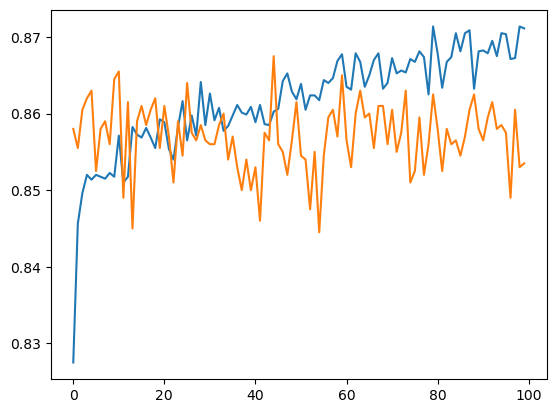

In [46]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])

In [47]:
(transformed_X_train.shape[1],)

(13,)

In [48]:
preprocessor

ColumnTransformer(transformers=[('num_features', StandardScaler(),
                                 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                ('cat_features', OneHotEncoder(),
                                 Index(['Geography', 'Gender'], dtype='object'))])

In [49]:
model

<Sequential name=sequential, built=True>

In [50]:
with open("artifacts/preprocessor.pkl","wb") as file:
    pickle.dump(preprocessor,file)

In [51]:
with open("artifacts/model.pkl","wb") as file:
    pickle.dump(model,file)